In [ ]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import pylab as plt

from fbprophet import Prophet

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error

plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tc = pd.read_excel('/content/drive/MyDrive/Consulta_TC.xlsx', index_col=[0],
                   parse_dates=[0])

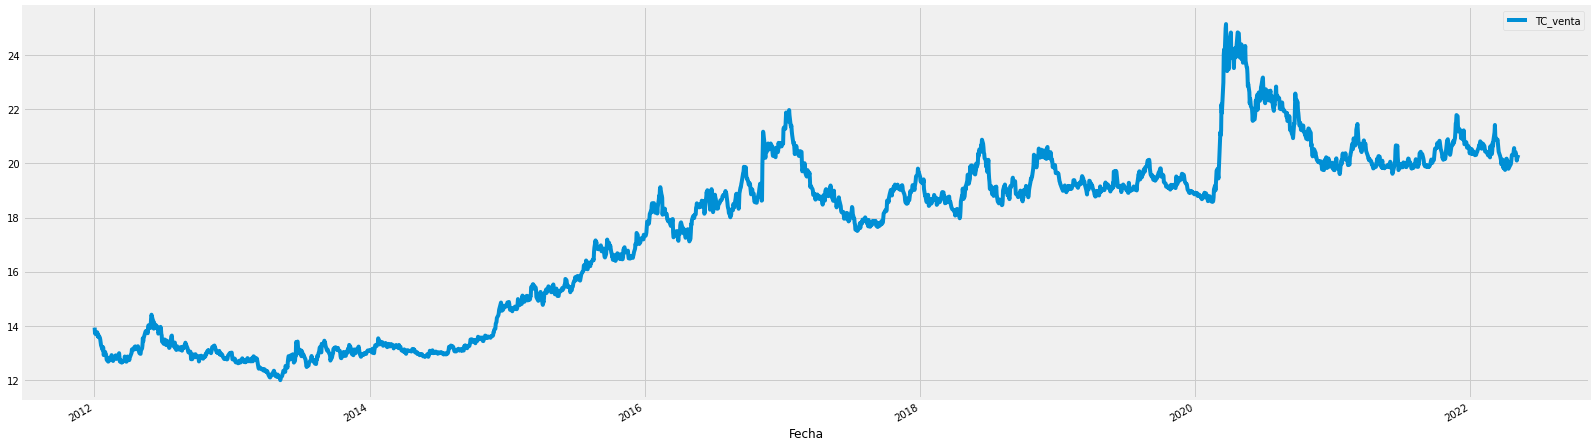

In [ ]:
tc.plot()
ylabels='Tipo de Cambio';

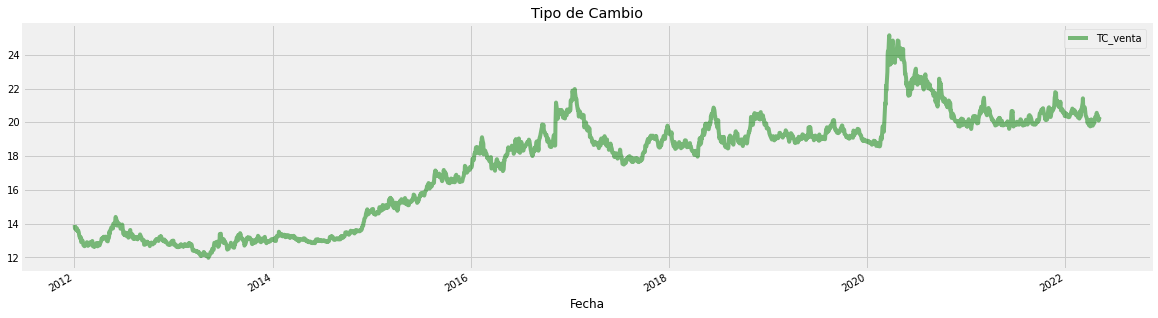

In [ ]:
serie = tc.plot(style='-', figsize=(18, 5), color='g', alpha=0.5, title='Tipo de Cambio');

In [ ]:
def time_features(df): 
  """
  Esta función extrae características de tiempo 
  a una columna de fecha.
  """

  df = df.copy()

  df['date'] = df.index
  df['hour'] = df.date.dt.hour
  df['day_of_week'] = df.date.dt.dayofweek
  df['quarter'] = df.date.dt.quarter
  df['month'] = df.date.dt.month
  df['year'] = df.date.dt.year
  df['day_of_year'] = df.date.dt.dayofyear
  df['day_of_month'] = df.date.dt.day
  df['week_of_year'] = df.date.dt.weekofyear
  
  return df

In [ ]:
data = time_features(tc).dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [ ]:
data

,TC_venta,date,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year
Fecha,,,,,,,,,,
2012-01-02,13.9250,2012-01-02,0,0,1,1,2012,2,2,1
2012-01-03,13.7200,2012-01-03,0,1,1,1,2012,3,3,1
2012-01-04,13.6900,2012-01-04,0,2,1,1,2012,4,4,1
2012-01-05,13.7592,2012-01-05,0,3,1,1,2012,5,5,1
2012-01-06,13.7628,2012-01-06,0,4,1,1,2012,6,6,1
...,...,...,...,...,...,...,...,...,...,...
2022-05-03,20.3470,2022-05-03,0,1,2,5,2022,123,3,18
2022-05-04,20.2650,2022-05-04,0,2,2,5,2022,124,4,18
2022-05-05,20.1090,2022-05-05,0,3,2,5,2022,125,5,18


In [ ]:
split_date = '2021-04-30'

train = tc.loc[tc.index <= split_date].copy()
test = tc.loc[tc.index > split_date].copy()

train = train.reset_index().rename(columns={'Fecha': 'ds', 'TC_venta': 'y'})
test = test.reset_index().rename(columns={'Fecha': 'ds', 'TC_venta': 'y'})

In [ ]:
test

,ds,y
0,2021-05-03,20.272
1,2021-05-04,20.255
2,2021-05-05,20.227
3,2021-05-06,20.252
4,2021-05-07,19.938
...,...,...
254,2022-05-03,20.347
255,2022-05-04,20.265
256,2022-05-05,20.109
257,2022-05-06,20.184


In [ ]:
#Primer Modelo Prophet
m = Prophet(changepoint_prior_scale=0.01, changepoints=['2020-03-17']).fit(train)
predict = m.predict(test)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-03,21.574489,19.670830,23.149911,21.574489,21.574489,-0.170520,-0.170520,-0.170520,-0.342564,-0.342564,-0.342564,0.172044,0.172044,0.172044,0.0,0.0,0.0,21.403969
1,2021-05-04,21.574732,19.730396,22.986755,21.574732,21.574732,-0.150385,-0.150385,-0.150385,-0.338273,-0.338273,-0.338273,0.187888,0.187888,0.187888,0.0,0.0,0.0,21.424347
2,2021-05-05,21.574975,19.984231,23.088159,21.574975,21.574975,-0.112223,-0.112223,-0.112223,-0.314436,-0.314436,-0.314436,0.202213,0.202213,0.202213,0.0,0.0,0.0,21.462752
3,2021-05-06,21.575217,19.927708,23.247050,21.575217,21.575217,-0.111074,-0.111074,-0.111074,-0.325956,-0.325956,-0.325956,0.214882,0.214882,0.214882,0.0,0.0,0.0,21.464144
4,2021-05-07,21.575460,19.950633,22.996817,21.575460,21.575460,-0.122995,-0.122995,-0.122995,-0.348790,-0.348790,-0.348790,0.225795,0.225795,0.225795,0.0,0.0,0.0,21.452465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2022-05-03,21.663091,19.991495,23.141926,21.663091,21.663091,-0.170408,-0.170408,-0.170408,-0.338273,-0.338273,-0.338273,0.167864,0.167864,0.167864,0.0,0.0,0.0,21.492683
255,2022-05-04,21.663334,20.010590,23.220863,21.663334,21.663334,-0.130372,-0.130372,-0.130372,-0.314436,-0.314436,-0.314436,0.184064,0.184064,0.184064,0.0,0.0,0.0,21.532962
256,2022-05-05,21.663577,19.974514,23.204521,21.663577,21.663577,-0.127174,-0.127174,-0.127174,-0.325956,-0.325956,-0.325956,0.198782,0.198782,0.198782,0.0,0.0,0.0,21.536403
257,2022-05-06,21.663820,19.884547,23.101354,21.663820,21.663820,-0.136914,-0.136914,-0.136914,-0.348790,-0.348790,-0.348790,0.211876,0.211876,0.211876,0.0,0.0,0.0,21.526906


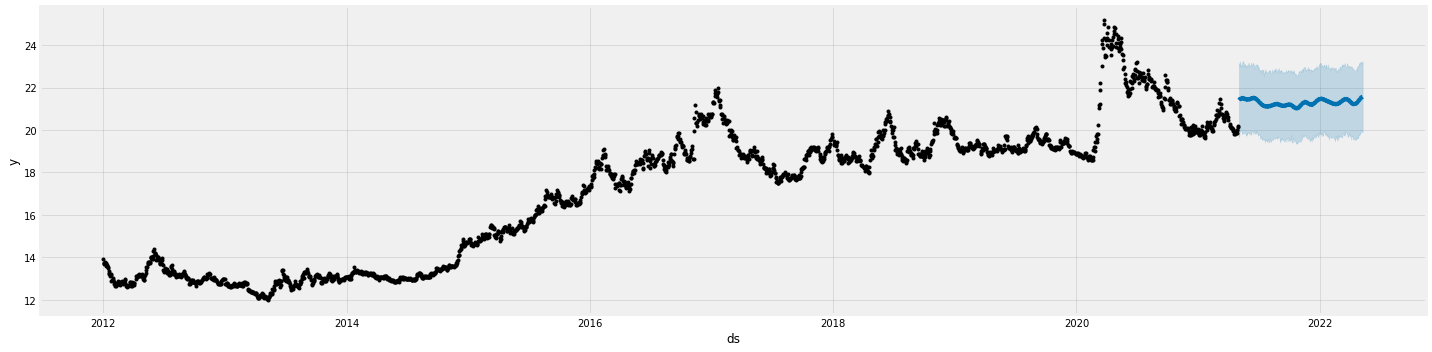

In [ ]:
fig, ax = plt.subplots(1)
fig.set_figheight(5)
fig.set_figwidth(20)
f = m.plot(predict, ax=ax)

In [ ]:
# Root Mean Square Error, raíz del error cuadrático medio 

mse(test.y, predict.yhat) ** 0.5

1.0598355386356133

In [ ]:
mean_absolute_percentage_error(test.y, predict.yhat)*100

4.853654879179899

FORECAST PRIMER MODELO 

In [ ]:
future = m.make_future_dataframe(periods=395)
future.tail()

,ds
2733,2022-05-26
2734,2022-05-27
2735,2022-05-28
2736,2022-05-29
2737,2022-05-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(22)

,ds,yhat,yhat_lower,yhat_upper
2716,2022-05-09,21.562470,19.978938,23.276052
2717,2022-05-10,21.572853,19.940267,23.229898
2718,2022-05-11,21.600963,19.903316,23.307828
2719,2022-05-12,21.591964,19.930718,23.179904
2720,2022-05-13,21.569999,20.057222,23.305656
2721,2022-05-14,22.753146,21.116343,24.270228
2722,2022-05-15,22.751128,21.114658,24.340087
2723,2022-05-16,21.570349,20.023786,23.149006
2724,2022-05-17,21.570444,19.957657,23.262850
2725,2022-05-18,21.589306,19.998270,23.352563


SEGUNDO MODELO

In [ ]:
#Segundo Modelo Prophet con el parámetro de change_point_prior de 0.05, este parametro busca ajustar los cambios de tendencia. 
#Entre mayor sea este parámetro mayor será la flxibilidad para ajsutar la tendencia, escogi el valor por default de la documentación.
m2 = Prophet(changepoint_prior_scale=0.05, changepoints=['2020-03-17']).fit(train)
predict2 = m2.predict(test)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
predict2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-03,21.065317,19.409364,22.506306,21.065317,21.065317,-0.179933,-0.179933,-0.179933,-0.354485,-0.354485,-0.354485,0.174552,0.174552,0.174552,0.0,0.0,0.0,20.885384
1,2021-05-04,21.063997,19.330398,22.529097,21.063997,21.063997,-0.162772,-0.162772,-0.162772,-0.349772,-0.349772,-0.349772,0.187001,0.187001,0.187001,0.0,0.0,0.0,20.901225
2,2021-05-05,21.062677,19.312571,22.671170,21.062677,21.062677,-0.127788,-0.127788,-0.127788,-0.325781,-0.325781,-0.325781,0.197992,0.197992,0.197992,0.0,0.0,0.0,20.934888
3,2021-05-06,21.061357,19.206891,22.622125,21.061357,21.061357,-0.129853,-0.129853,-0.129853,-0.337287,-0.337287,-0.337287,0.207434,0.207434,0.207434,0.0,0.0,0.0,20.931503
4,2021-05-07,21.060037,19.235339,22.551076,21.060037,21.060037,-0.145987,-0.145987,-0.145987,-0.361249,-0.361249,-0.361249,0.215262,0.215262,0.215262,0.0,0.0,0.0,20.914050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2022-05-03,20.583529,18.718159,22.035705,20.583529,20.583529,-0.178546,-0.178546,-0.178546,-0.349772,-0.349772,-0.349772,0.171226,0.171226,0.171226,0.0,0.0,0.0,20.404984
255,2022-05-04,20.582209,18.661689,22.021725,20.582209,20.582209,-0.141760,-0.141760,-0.141760,-0.325781,-0.325781,-0.325781,0.184021,0.184021,0.184021,0.0,0.0,0.0,20.440450
256,2022-05-05,20.580889,18.749765,22.159377,20.580889,20.580889,-0.141900,-0.141900,-0.141900,-0.337287,-0.337287,-0.337287,0.195387,0.195387,0.195387,0.0,0.0,0.0,20.438989
257,2022-05-06,20.579570,18.652201,22.038568,20.579570,20.579570,-0.156027,-0.156027,-0.156027,-0.361249,-0.361249,-0.361249,0.205223,0.205223,0.205223,0.0,0.0,0.0,20.423543


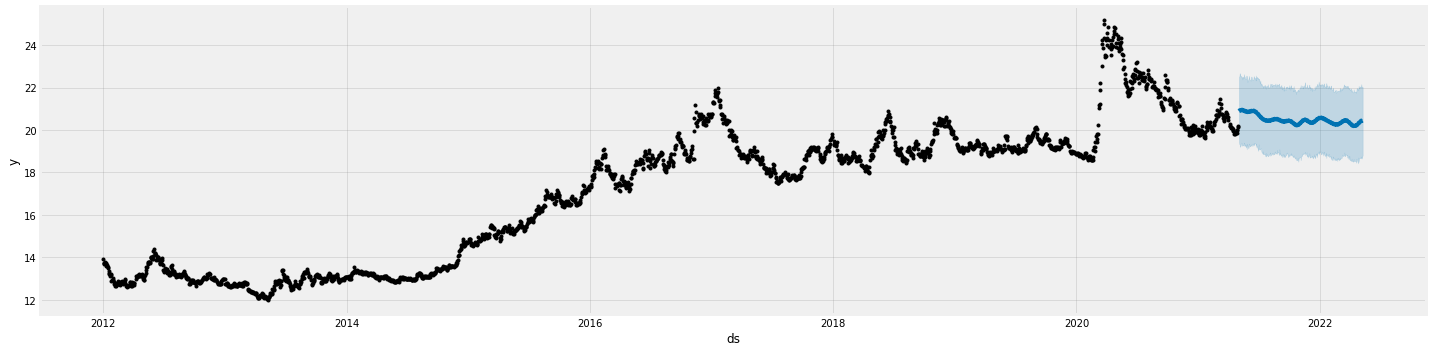

In [ ]:
fig, ax = plt.subplots(1)
fig.set_figheight(5)
fig.set_figwidth(20)
f = m2.plot(predict2, ax=ax)

In [ ]:
# Root Mean Square Error, raíz del error cuadrático medio 

mse(test.y, predict2.yhat) ** 0.5

0.5427729423102668

In [ ]:
mean_absolute_percentage_error(test.y, predict2.yhat)*100

2.1433661174028926

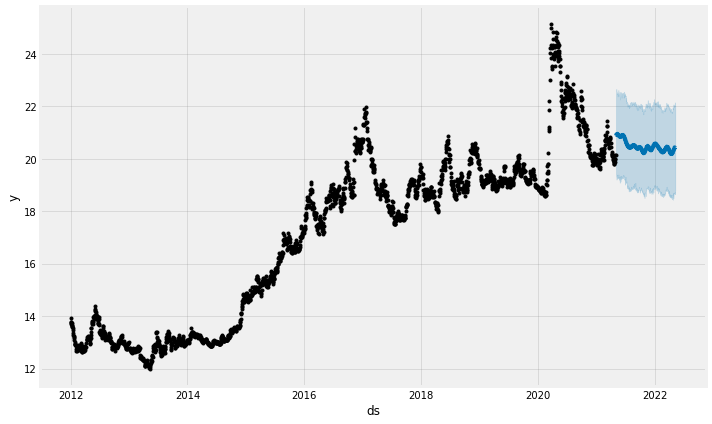

In [ ]:
fig = m2.plot(predict2)